<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 2</h2>
<h3 align='center'>Jan 28, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Part 1
Numpy and matplotlib are imported inline using pylab. The plot size and font size are increased.

In [1]:
# Importing numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Increase figure and font size
rcParams['figure.figsize'] = 12,9
rcParams['font.size'] = 25
rcParams['text.usetex'] = True

The required function is defined below:
$$f(t) = \frac{1}{1+t^2}$$

In [3]:
def f(t):
    return 1/(1+t*t)

In [4]:
f(arange(10)) # Works with numpy arrays

array([ 1.        ,  0.5       ,  0.2       ,  0.1       ,  0.05882353,
        0.03846154,  0.02702703,  0.02      ,  0.01538462,  0.01219512])

# Part 2
A vector from **start** to **stop** with increments of size **step** is defined below:

In [5]:
start = 0
end = 5
step = 0.1
x = linspace(start,end,int(1+(end-start)/step))
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ])

# Part 3
The function **f** is plotted using the vector defined above:

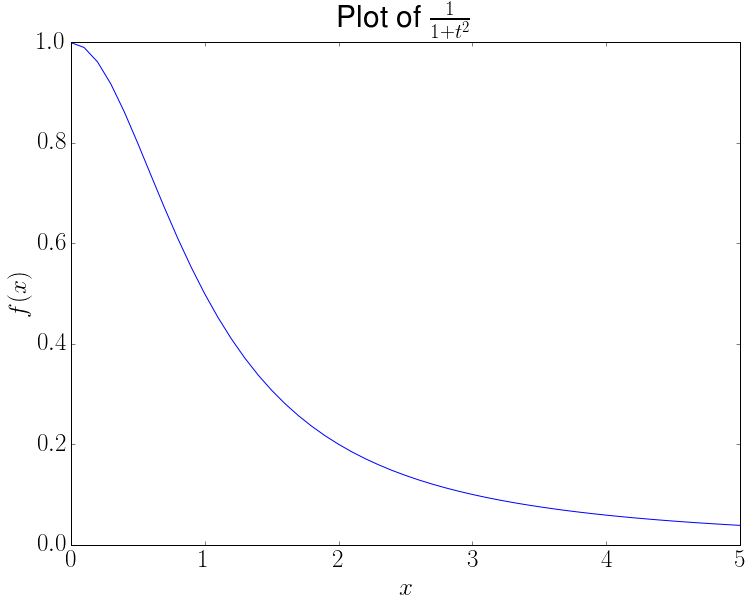

In [6]:
figure()
title(r"Plot of $\frac{1}{1+t^2}$")
plot(x,f(x))
xlabel("$x$")
ylabel("$f(x)$")
show()

# Part 4
Finding $tan^{-1}(x)$ by integrating $\frac{1}{1+t^2}$.

In [7]:
# Import scipy and quad
from scipy.integrate import quad

In [8]:
integrals = [] # integral values
errors = [] # errors returned by quad

# Computation done using a for loop
for a in x:
    i,e = quad(f,0,a)
    integrals.append(i)
    errors.append(e)

The plot comparing the integral method and the numpy arctan function is shown below:

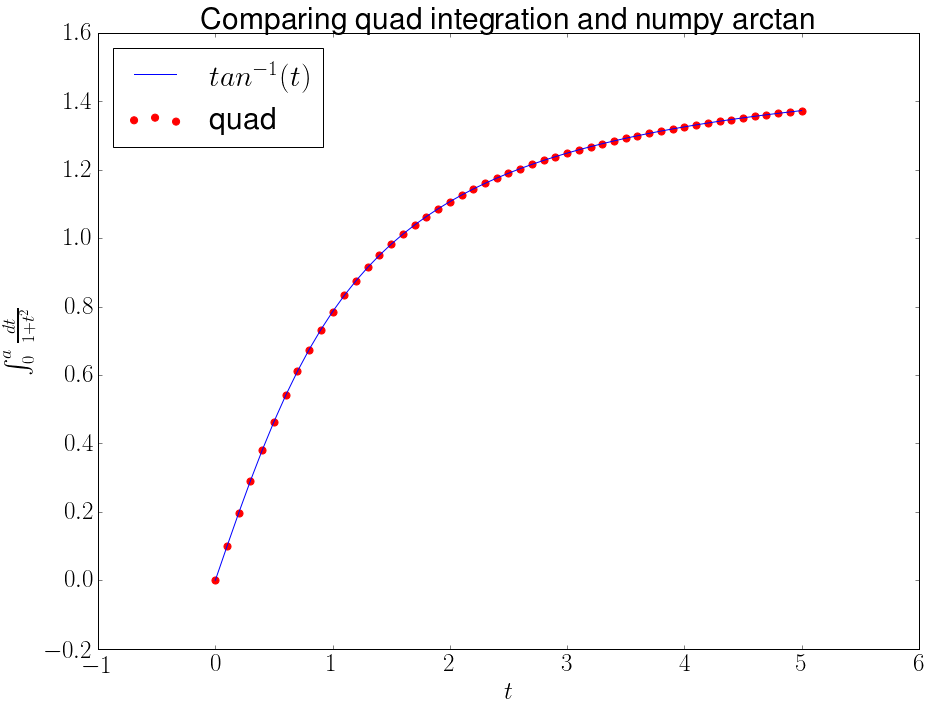

In [9]:
fig0 = figure()
ax = fig0.add_axes([0.05,0.95,0.95,0.95])
ax.scatter(x,integrals,color='red',s=50)
ax.plot(x,arctan(x))
ax.set_title("Comparing quad integration and numpy arctan")
ax.set_ylabel(r"$\int_0^a{\frac{dt}{1+t^2}}$", fontsize = 26)
ax.set_xlabel(r"$t$")
ax.legend(["$tan^{-1}(t)$","quad"],loc=0)
show()

The error returned by quad is plotted below on a semi-log axis:

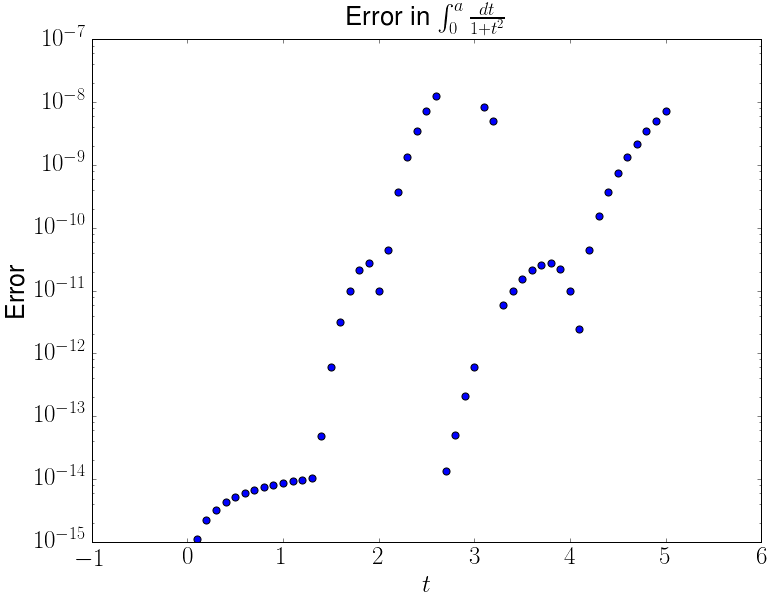

In [10]:
semilogy()
scatter(x,errors,s=50)
title(r"Error in $\int_0^a{\frac{dt}{1+t^2}}$", fontsize=26)
ylabel("Error")
xlabel("$t$")
show()

# Part 5
## Question (a)
The trapezoidal integration method is implemented using a python loop below. The running sum is manually calculated, and is reused to find the value of the integral at each time step.

In [11]:
def trapForLoop(f,start,end,h):
    """
    Integrates f from start to end using the Trapezoidal method with
    step size h. 
    
    Returns a vector of values corresponding to the integral at each
    time step.
    
    (using a loop)
    """
    x = start
    val=0
    s=0 # cumulative sum
    f0 = f(start) # first function value
    integrals = [] # stores integral at each time step
    
    # python loop implementation of the trapezoidal method
    while x <= end:
        val = f(x)
        s += val
        x += h
        
        integrals.append((s-0.5*(f0+val))*h)
        
    return integrals

## Question (b)
The same algorithm is implemented using vectorized numpy code. The main computation boils down to just one line.

In [12]:
def trap(f,start,end,h):
    """
    Integrates f from start to end using the Trapezoidal method with
    step size h. 
    
    Returns a vector of values corresponding to the integral at each
    step.
    
    (vectorized)
    """
    # Create the x values
    x = linspace(start,end,1+(end-start)/h)
    
    # Apply function
    y = f(x)
    
    # Integrate using vector operations
    return h*(cumsum(y)-0.5*(y[0]+y))

Let us compare the efficiency of the two approaches. 
* Clearly, the numpy version is much more concise and readable when compared to the lengthy loop implementation. 
* Let us compare the speeds of the two approaches, using a constant step size of, say, $10^{-5}$.

In [13]:
h = 1e-5 # step size

In [14]:
%%timeit
trapForLoop(f,0,1,h)

62.8 ms ± 7.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
trap(f,0,1,h)

1.49 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


From the above measurements, we can conclude that the vectorized version of the algorithm performs around 40 to 50 times faster than the python loop implementation! This underlines the importance of writing vectorized code wherever possible.

The plot of the results of trap integration is added to the first figure and shown below:

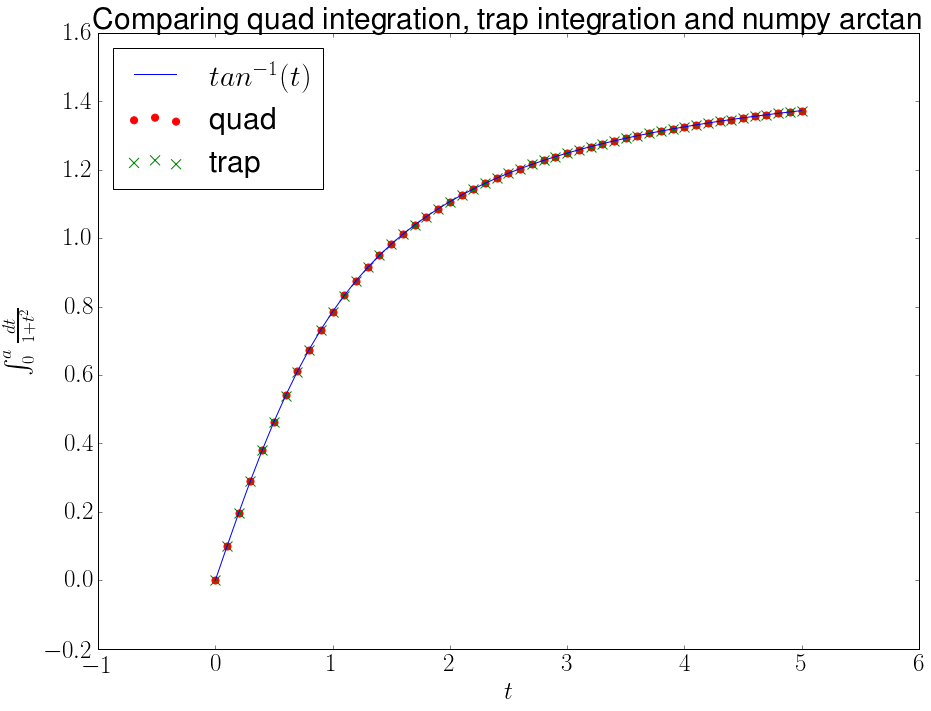

In [16]:
ax.scatter(x,trap(f,0,5,0.1),marker='x',s=100,color='green')
ax.set_title("Comparing quad integration, trap integration and numpy arctan")
ax.legend(["$tan^{-1}(t)$","quad","trap"],loc=0)
fig0

## Question (c)
Now, let us estimate the error for different values of the step size $h$ and compare it with the actual error. The error is estimated by treating the value obtained by using half the step-size as the true value. The error between two evaluations is the maximum absolute error over all steps of the integration.

In [17]:
hs = [] # array of h values
esterrs = [] # estimated errors
acterrs = [] # actual errors
h=0.5 # initial value of h
tolerance = 1e-8 # desired tolerance
e = tolerance+1 # initialize error greater than tolerance
start = 0 # start of integration
end = 1 # end of integration

# A helper function to generate a linspace from start to
# end with stepsize of h
xvals = lambda h:linspace(start,end,1+(end-start)/h)

ints = 0 # estimating error for these integral values

# the better values obtained by halving the step-size
# these are treated as true values when compared to 'ints'
better_ints = trap(f,start,end,h) 

# loop until the error falls below our desired tolerance
while e>tolerance:
    ints = better_ints # update the current integral values
    
    # find the better values which will be treated as true values
    better_ints = trap(f,start,end,h/2)
    
    # find the estimated error by comparing common points
    e = max(abs(ints-better_ints[::2]))
    
    hs.append(h)
    esterrs.append(e)
    
    # find the actual errors
    acterrs.append(max(abs(ints-arctan(xvals(h)))))
    
    # update the step size
    h/=2

Let us plot the estimated and actual errors on a log-log plot to compare them.

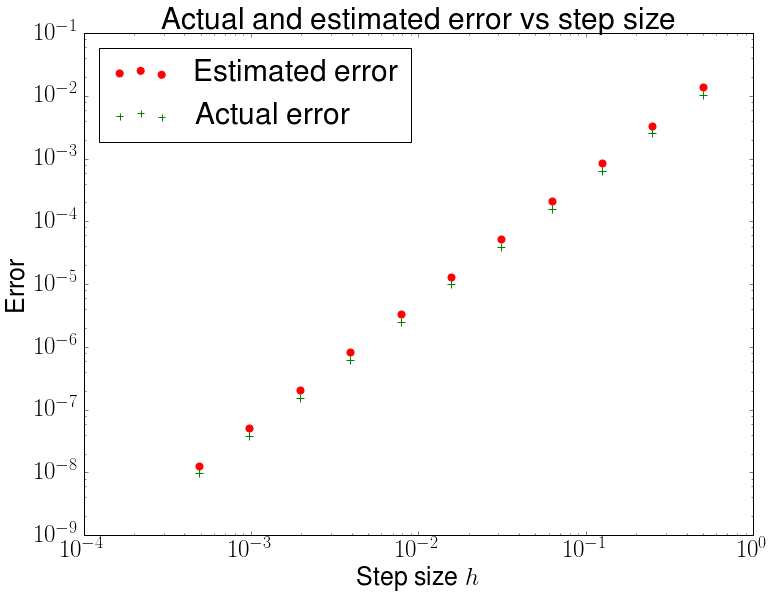

In [18]:
loglog()
scatter(hs,acterrs,color='red',s=50)
scatter(hs,esterrs,color='green',marker='+',s=50)
ylabel("Error")
xlabel("Step size $h$")
title("Actual and estimated error vs step size")
legend(["Estimated error", "Actual error"],loc=2)
show()

Let's find the least squares linear regression slope of the above log-log plot of the estimated error:

In [19]:
from scipy.stats import linregress
logh = log(array(hs))
loge = log(array(esterrs))
print(linregress(logh,loge).slope)

2.0004028135


## Conclusions
We can make the following observations based on the plot above:
* The estimated error is not equal to the actual error. We must use the estimated error to determine step size when we do not know the analytic integral of the function we are integrating.
* The slope of the error vs step-size plot is very close to 2. This means that the error in the value of the integral grows as $\mathcal{O}(h^2)$, which matches with the analytical result.